##Install Library

In [ ]:
pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=a593445d8b990f65379da84c9e25fbc81c9e862ae0db33306e6fd92b3eba1587
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built MiniSom


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

##Input data

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/creditcard_2023.csv/creditcard_2023.csv')
data

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

##Preprocessing

In [ ]:
# Cek duplikat value
if data.duplicated().any():
    print("Ada duplikat nilai dalam dataet.")
else:
    print("Tidak ada duplikat nilai dalam data.")

Tidak ada duplikat nilai dalam data.


In [ ]:
# Cek NaN values
data.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

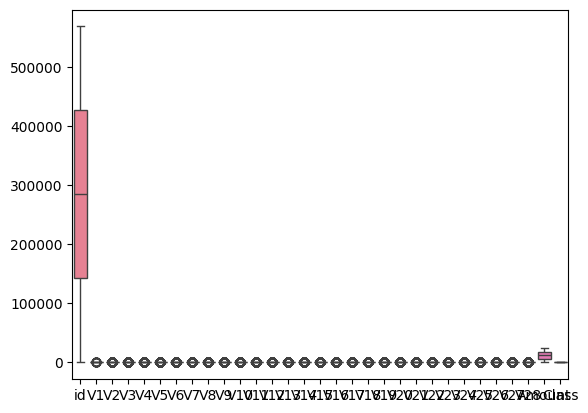

In [ ]:
# Cek outlier
sns.boxplot(data)

In [ ]:
# Memisahkan fitur dan target dari data
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(f"X Dimension = {X.shape}")
print(f"y Dimension = {y.shape}")

X Dimension = (568630, 30)
y Dimension = (568630,)


In [ ]:
# Normalisasi Fitur
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

print("Data yang Telah Dinormalisasi:")
X_df = pd.DataFrame(X, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'])
print(X_df)

Data yang Telah Dinormalisasi:
              V1        V2        V3        V4        V5        V6        V7  \
0       0.000000  0.565091  0.911068  0.328143  0.597037  0.191428  0.462018   
1       0.000002  0.782703  0.913159  0.216170  0.554606  0.194228  0.455582   
2       0.000004  0.565157  0.902238  0.283790  0.551131  0.190372  0.476540   
3       0.000005  0.584043  0.910345  0.284848  0.473588  0.193703  0.470699   
4       0.000007  0.574494  0.916671  0.272150  0.552320  0.190981  0.457739   
...          ...       ...       ...       ...       ...       ...       ...   
568625  0.999993  0.465034  0.920852  0.131948  0.718217  0.169934  0.456700   
568626  0.999995  0.493503  0.915978  0.179994  0.574517  0.186428  0.451533   
568627  0.999996  0.556121  0.919638  0.191875  0.602904  0.188163  0.449078   
568628  0.999998  0.721873  0.910197  0.166548  0.589585  0.191454  0.440296   
568629  1.000000  0.471723  0.927687  0.146429  0.653270  0.184315  0.433753   

        

#Training

In [ ]:
# Training the SOM
som = MiniSom(x=10, y=10, input_len=30, sigma=1.0, learning_rate=0.5, random_seed = 2)

In [ ]:
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

#Visualisasi

In [ ]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show

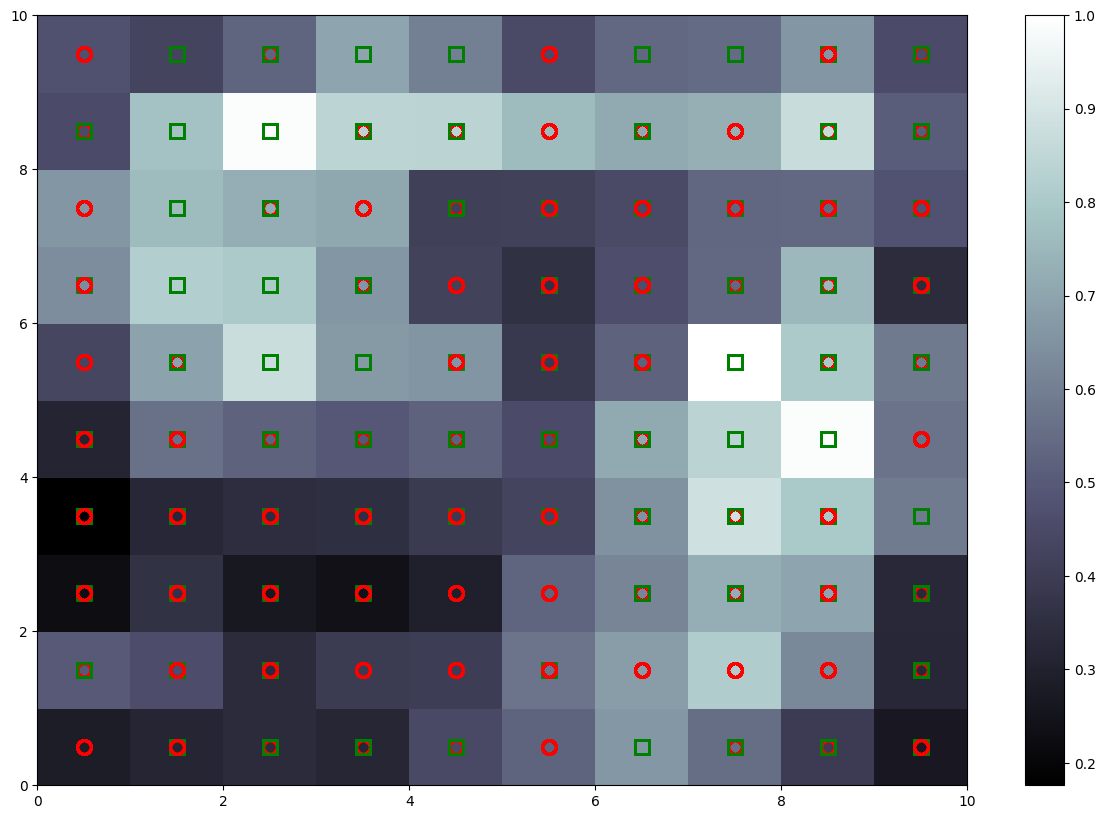

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()

In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[( 3 , 9 )], mappings[( 8 , 6 )], mappings[( 9 , 5 )]), axis = 0 )
frauds = sc.inverse_transform(frauds)
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

total_frauds = len(frauds)
print('Total number of frauds:', total_frauds)

Streaming output truncated to the last 5000 lines.
172813
172830
172843
172868
172869
172880
172887
172894
172900
172907
172934
172943
172948
172954
172984
172994
173000
173006
173011
173036
173041
173050
173058
173065
173088
173096
173101
173102
173113
173132
173143
173154
173181
173192
173278
173279
173280
173285
173306
173343
173352
173357
173373
173385
173388
173389
173402
173415
173422
173440
173456
173473
173476
173481
173484
173498
173509
173520
173525
173535
173540
173550
173569
173579
173607
173617
173618
173633
173650
173656
173671
173675
173680
173681
173684
173720
173721
173737
173739
173750
173751
173752
173763
173768
173774
173799
173809
173810
173816
173822
173844
173852
173856
173887
173898
173899
173914
173955
173988
173989
173994
174005
174007
174008
174037
174038
174039
174046
174058
174070
174073
174094
174096
174122
174134
174184
174196
174198
174236
174259
174263
174265
174270
174296
174301
174309
174321
174335
174343
174350
174357
174373
174383
174384
174387
1743

In [ ]:
frauds = np.concatenate((mappings[( 3 , 9 )], mappings[( 8 , 6 )], mappings[( 9 , 5 )]), axis=0)
frauds = sc.inverse_transform(frauds)
pd.DataFrame(frauds)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,284890.0,-1.704517,2.599199,-1.205391,0.503527,-0.949674,3.226002,-2.323095,-6.027712,0.273389,...,-4.118596,8.087080,-6.450353,6.343132,-1.075048,0.349881,-0.240261,1.534445,2.154102,14540.78
1,284967.0,-1.704517,2.599199,-1.205391,0.503527,-0.949674,3.226002,-2.323095,-6.027712,0.273389,...,-4.118596,8.087080,-6.450353,6.343132,-1.075048,0.349881,-0.240261,1.534445,2.154102,288.76
2,284983.0,-1.704517,2.599199,-1.205391,0.503527,-0.949674,3.226002,-2.323095,-6.027712,0.273389,...,-4.118596,8.087080,-6.450353,6.343132,-1.075048,0.349881,-0.240261,1.534445,2.154102,430.74
3,285001.0,-1.704517,2.599199,-1.205391,0.503527,-0.949674,3.226002,-2.323095,-6.027712,0.273389,...,-4.118596,8.087080,-6.450353,6.343132,-1.075048,0.349881,-0.240261,1.534445,2.154102,6965.76
4,285038.0,-1.704517,2.599199,-1.205391,0.503527,-0.949674,3.226002,-2.323095,-6.027712,0.273389,...,-4.118596,8.087080,-6.450353,6.343132,-1.075048,0.349881,-0.240261,1.534445,2.154102,5702.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24891,284446.0,0.094144,-0.478885,0.495141,-2.499746,0.604630,-0.462079,0.683783,-0.171885,1.050476,...,-0.346867,-0.171941,-0.605752,-0.087848,-0.659029,0.150949,-1.507411,-0.323276,-0.260629,2443.06
24892,284627.0,0.252611,-0.175725,0.372555,-1.191939,0.817435,0.477473,0.807456,-0.156769,0.304868,...,-0.095199,-0.221449,-0.610442,-0.147902,-2.172779,-0.577572,0.462715,0.058333,0.081124,303.52
24893,284803.0,-0.080325,-0.463534,1.977771,-1.016889,0.643741,1.046862,0.441402,-0.084550,0.880137,...,-0.102161,-0.018251,0.857735,-0.011161,-1.658129,-1.036511,-0.958793,-0.158577,-0.229647,3614.52
24894,293116.0,0.006668,-0.015267,0.196877,0.088504,1.295003,0.021196,0.617629,-0.138376,0.221823,...,0.080147,-0.231952,-0.665147,-0.302470,-1.591456,0.400517,-0.467779,-0.121721,0.155736,340.44
